# Step-1

# **Import packages**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers,models
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step−2 :

# **About the datase**

Here we use a dataset name : CIFAR

It containes 60000 images and 10 classes

Each class containes 6000 images

Data set is divided into two parts training images: 50,000

testing images: 10,000

In [ ]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
train_images.shape

# 50000 images
# 32 is width
# 32 is height
# 3 RGB : these are colour images

(50000, 32, 32, 3)

# Step−3 :

# **Draw the images**

In [ ]:
# Take the class labels first

train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
len(datasets.cifar10.load_data())

2

In [ ]:
class_name=['A','B','C','D','E','F','G','H','I','J']
len(class_name)

10

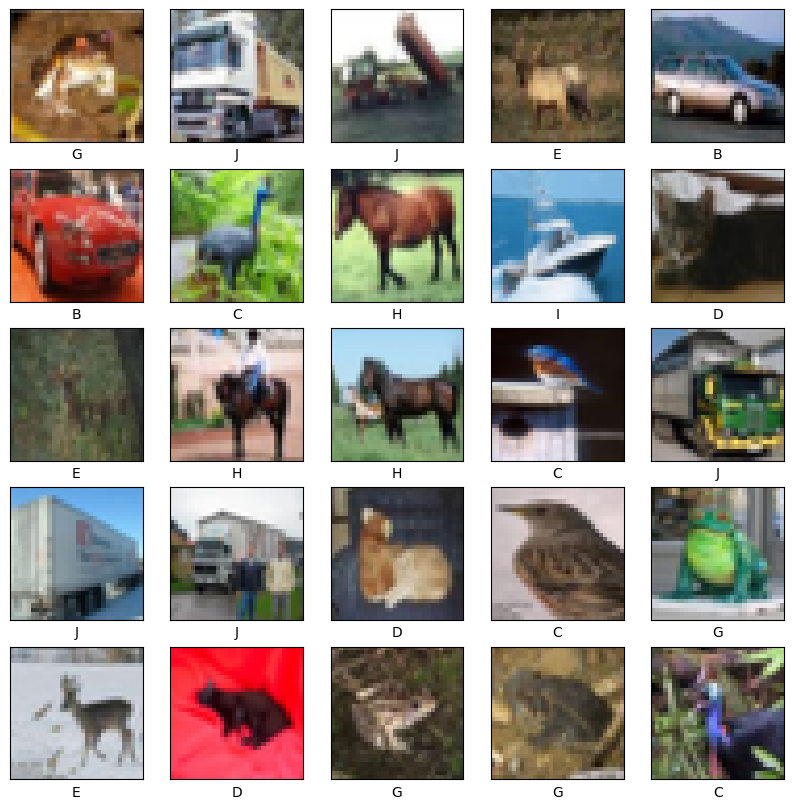

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_name[train_labels[i][0]])
plt.show()

# Step−4

# **Create the CNN network**

- Convolution

- Activation

- Striding (default =1) (not necessary to provide

- Padding (not necessary to provide)

- pooling

In [ ]:
model=models.Sequential()

In [ ]:
model.add(layers.Conv2D(32,         # filters
                    (3,3),          # filter size/kernal size
                        activation='relu',
                        input_shape=(32,32,3)))     # Stride / padding : default
model.add(layers.MaxPool2D((2,2)))      # shape of the pool

###############################################################################################


model.add(layers.Conv2D(64,               # filters
                       (3,3),             # filter size/kernal size
                       activation='relu'))   # Stride / padding : default
model.add(layers.MaxPool2D((2,2)))

###############################################################################################

model.add(layers.Conv2D(64,                         # filters
                       (3,3),                       # filter size/kernal size
                       activation='relu'))
model.add(layers.MaxPool2D((2,2)))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0

# Step−5 :

# **Add dense layers**

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0

# Step−6 :

# **Compile the model**

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])  #loss, # metric          #optimizer= adam
history=model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

# 1 epoch= one forward pass + one backward pass

Epoch 1/10
1563/1563 [==============================] - 12s 5ms/step - loss: 1.9489 - accuracy: 0.3529 - val_loss: 1.4495 - val_accuracy: 0.4739
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3965 - accuracy: 0.5001 - val_loss: 1.2777 - val_accuracy: 0.5489
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2419 - accuracy: 0.5590 - val_loss: 1.1997 - val_accuracy: 0.5760
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1435 - accuracy: 0.5975 - val_loss: 1.1782 - val_accuracy: 0.5890
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0497 - accuracy: 0.6351 - val_loss: 1.0754 - val_accuracy: 0.6221
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9883 - accuracy: 0.6536 - val_loss: 1.0555 - val_accuracy: 0.6302
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9318 - accuracy: 0.6761 - val_loss: 1.0082 - val_accuracy

313/313 - 1s - loss: 0.9702 - accuracy: 0.6765 - 616ms/epoch - 2ms/step


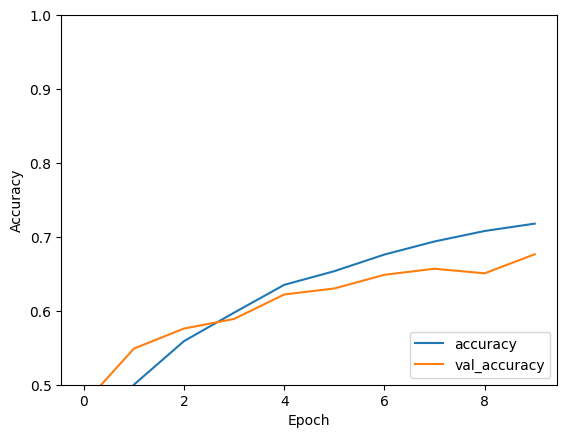

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')


test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)

In [ ]:
y_pred=model.predict(test_images)
y_pred

313/313 [==============================] - 1s 3ms/step


array([[  4.0193677 ,   6.7530966 ,   5.410331  , ...,   3.0530515 ,
          7.829315  ,   4.9315076 ],
       [ 13.068445  ,  13.011409  ,   6.410561  , ...,   2.3417294 ,
         15.219547  ,   8.387543  ],
       [  6.587261  ,   6.9677515 ,   3.8876312 , ...,   2.7378628 ,
          7.6514287 ,   5.908367  ],
       ...,
       [  0.39728227,  -2.5195096 ,   3.971192  , ...,   5.7368016 ,
         -1.6017355 ,   0.9416609 ],
       [  2.710764  ,   9.639377  ,   0.8450139 , ...,   0.7193957 ,
          0.10992317,   3.2205625 ],
       [ -6.447238  , -20.73175   ,  -1.8627973 , ...,   9.825718  ,
        -21.322077  , -17.178942  ]], dtype=float32)

In [ ]:
list1=[]
for i in test_labels:
  list1.extend(i)

In [ ]:
test_labels.flatten()

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [ ]:
import pandas as pd
y_pred=model.predict(test_images)
max_values=[np.max(i) for i in y_pred]
index=[np.argmax(i) for i in y_pred]
prediction=[class_name[i] for i in index]
Ground_Truth=[class_name[i] for i in list1]

d1=pd.DataFrame(zip(max_values,index,prediction,Ground_Truth),columns=['Max','Index','Predictions','Ground_Truth'])
d1['Output']=np.where(d1['Predictions']==d1['Ground_Truth'],1,0)
accuracy=np.sum(d1['Output'])/len(d1['Output'])
accuracy

313/313 [==============================] - 1s 2ms/step


0.6765

In [ ]:
d1

,Max,Index,Predictions,Ground_Truth,Output
0,13.633929,5,F,D,0
1,15.219547,8,I,I,1
2,7.651429,8,I,I,1
3,12.346888,0,A,A,1
4,7.351810,6,G,G,1
...,...,...,...,...,...
9995,12.573977,3,D,I,0
9996,8.894444,6,G,D,0
9997,8.046700,5,F,F,1
9998,9.639377,1,B,B,1


In [ ]:
model.weights[0]

<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 3, 32) dtype=float32, numpy=
array([[[[-3.99220223e-03, -1.25714168e-01,  8.81747603e-02,
           6.79832622e-02,  3.84819694e-02, -3.97147015e-02,
           6.22825418e-03,  1.79796457e-01, -1.18180066e-02,
          -2.40357202e-02, -8.18820968e-02,  1.51730701e-01,
          -6.16357103e-03,  9.42760780e-02,  2.94066239e-02,
          -3.54551524e-02, -4.21917513e-02, -9.59660783e-02,
          -3.94750014e-02,  6.25640526e-02,  2.05104444e-02,
           1.44048288e-01, -2.24235058e-01,  6.34979606e-02,
          -3.54496576e-02, -2.97241863e-02,  9.08451825e-02,
           1.10700704e-01, -1.54316053e-01,  1.07296422e-01,
          -2.00679928e-01, -3.96414064e-02],
         [-4.82043587e-02, -6.22380711e-02,  1.11283742e-01,
           6.40030950e-02, -6.77671749e-04,  7.71367252e-02,
          -3.99783775e-02,  1.03289016e-01, -3.64291407e-02,
          -2.01366574e-01, -8.71133059e-02,  6.38556555e-02,
           1.48393109e-01,  

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 64)          0

In [ ]:
len(model.weights[0].numpy()[0][0][0])

32

In [ ]:
model.weights[1]

<tf.Variable 'conv2d/bias:0' shape=(32,) dtype=float32, numpy=
array([ 1.73803374e-01,  1.54318482e-01,  2.33969048e-01, -3.43704492e-01,
       -1.54773667e-01,  9.72400010e-02, -6.53896451e-01, -4.59506541e-01,
       -2.52604578e-02,  2.50881091e-02,  1.00258924e-01,  2.00622201e-01,
        3.35067362e-01, -8.29553455e-02, -2.71730363e-01, -2.35692650e-01,
        3.15637700e-02,  4.27799374e-01, -3.14564437e-01,  1.41472533e-01,
       -8.03891122e-01,  5.99934720e-02,  5.62875867e-01, -4.20568697e-02,
        4.29123873e-04, -2.09363967e-01,  1.43357679e-01,  1.06539115e-01,
        3.66236925e-01, -3.11671138e-01,  2.78806426e-02,  3.32782745e-01],
      dtype=float32)>

In [ ]:
model.weights[2]

<tf.Variable 'conv2d_1/kernel:0' shape=(3, 3, 32, 64) dtype=float32, numpy=
array([[[[-4.09569703e-02,  6.78769425e-02, -1.67541821e-02, ...,
           4.03524823e-02,  1.05835304e-01,  5.82322329e-02],
         [ 2.36661620e-02,  2.94420011e-02,  2.26671305e-02, ...,
          -2.15366781e-01,  1.05452456e-01, -8.30859542e-02],
         [ 4.72612446e-03, -2.88569778e-02, -4.25679125e-02, ...,
          -1.83403250e-02,  1.11454755e-01, -5.88563010e-02],
         ...,
         [ 1.80877708e-02,  8.37134421e-02,  9.13647264e-02, ...,
           2.38104165e-02, -7.16452748e-02,  1.75607890e-01],
         [-7.96629936e-02, -1.52156085e-01, -4.93369950e-03, ...,
          -2.54470501e-02, -1.10960849e-01,  1.87298432e-02],
         [-1.08551562e-01, -8.04688502e-03,  1.19548142e-02, ...,
          -1.09486960e-01,  6.55813068e-02,  1.17572248e-01]],

        [[ 3.35418209e-02,  1.49483634e-02,  9.59028024e-03, ...,
           2.17630491e-02, -2.02854779e-02, -9.00664255e-02],
         [-1